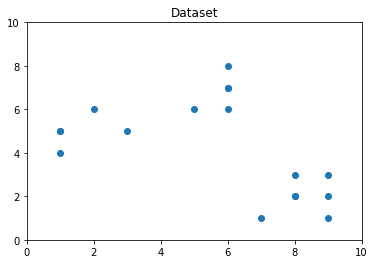

[3.4577032384495707, 1.7687413573405673, 0.8819889697423957, 0.7587138847606585, 0.6635212812400347, 0.580097449143775, 0.5093717077076824, 0.4442520441076937, 0.3333333333333333]


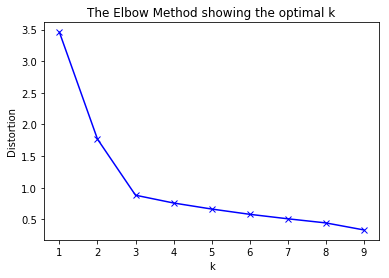

In [3]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt

x1 = np.array([3, 1, 1, 2, 1, 6, 6, 6, 5, 6, 7, 8, 9, 8, 9, 9, 8])
x2 = np.array([5, 4, 5, 6, 5, 8, 6, 7, 6, 7, 1, 2, 1, 2, 3, 2, 3])

plt.plot()
plt.xlim([0, 10])
plt.ylim([0, 10])
plt.title('Dataset')
plt.scatter(x1, x2)
plt.show()

# create new plot and data
plt.plot()
X = np.array(list(zip(x1, x2))).reshape(len(x1), 2)
colors = ['b', 'g', 'r']
markers = ['o', 'v', 's']

# k means determine k
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

# Plot the elbow
print(distortions)
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [4]:
user_calls[['t_x', 't_y']] = user_calls['temporal_features'].apply(pd.Series)

# Start clustering number hashes using temporal features
k_fitted_models = []
for k in range(1, MAX_CLUSTERS+1):
    if(k > len(user_calls)):
        break
    algo = KMeans(n_clusters = k, init='k-means++', verbose = 0)
    fitted = algo.fit(user_calls[['t_x', 't_y', 'w', 'hash_will_share']])
    k_fitted_models.append(fitted)

# Compute best k value based the elbow method
inertias = np.asarray([fitted.inertia_ for fitted in k_fitted_models])
gradients = -np.diff(np.asarray([fitted.inertia_ for fitted in k_fitted_models]))

delta_x = inertias[0]/MAX_CLUSTERS

sum_couples = [(sum(gradients[0:k]), inertias[k]) for k in range(1,len(gradients))]
atan_couples = [(sum_couples[k][0]/((k+1)*delta_x), sum_couples[k][1]/((len(gradients)-(k+1))*delta_x)) for k in range(len(sum_couples))]
angle_couples = [(atan(atan_couples[k][0])*180/pi, atan(atan_couples[k][1])*180/pi) for k in range(0,len(atan_couples))]
elbow_angles= [180-(angle_couples[k][0]-angle_couples[k][1]) for k in range(0,len(angle_couples))]

best_k = min(enumerate(elbow_angles), key=itemgetter(1))[0]+1 # +1 because the first point is not counted in differences such as gradient (+1)

NameError: name 'user_calls' is not defined